In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
import random
from KNN import Knn

## 1-Download dataset from kaggle or openlab website.

In [19]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv")
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="latin1")
data = pd.concat([df_female , df_male])
data.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,subjectid
0,10037.0,231,1282,301,204,1180,222,177,373,315,...,92Y,Germany,2,NaN,2,26,61,142,Right hand,NaN
1,10038.0,194,1379,320,207,1292,225,178,372,272,...,25U,California,3,Mexican,3,21,64,120,Right hand,NaN
2,10042.0,183,1369,329,233,1271,237,196,397,300,...,35D,Texas,1,NaN,1,23,68,147,Right hand,NaN
3,10043.0,261,1356,306,214,1250,240,188,384,364,...,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand,NaN
4,10051.0,309,1303,308,214,1210,217,182,378,320,...,42A,Texas,1,NaN,1,45,63,195,Right hand,NaN


## 2-Preprocess dateset for converting unit of weight, unit of height and datatype of gender.

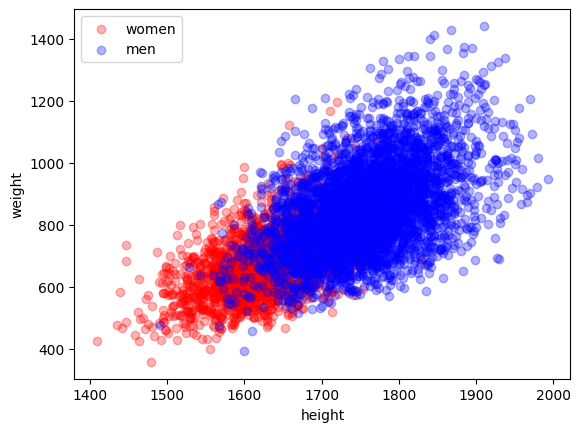

In [20]:
cmap=["red","blue"]
data['Gender']= data["Gender"].replace(["Female","Male"],[0,1])
plt.scatter(data.query("Gender == 0")["stature"],data.query("Gender == 0")["weightkg"],c="red",alpha=0.3)
plt.scatter(data.query("Gender == 1")["stature"],data.query("Gender == 1")["weightkg"],c="blue",alpha=0.3)
plt.legend(["women","men"])
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

## 3-Show heights for women and men on same plot.

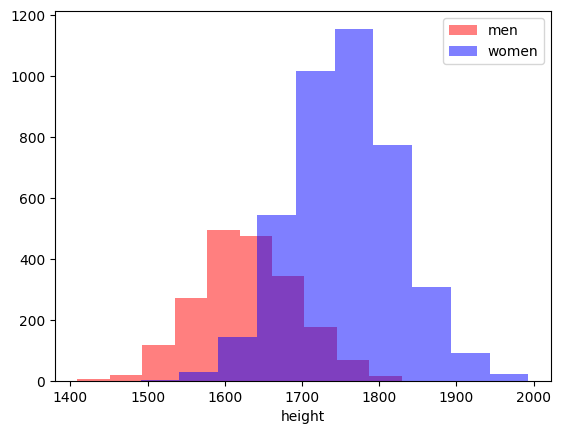

In [21]:
df_female_height = data.query("Gender == 0")["stature"]
df_male_height= data.query("Gender == 1")["stature"]
plt.hist(df_female_height, color="red",alpha=0.5)
plt.hist(df_male_height,color="blue",alpha=0.5)
plt.legend(["men","women"])
plt.xlabel("height")
plt.show()

## A. Why is the data of men higher than the data of women?

## B. Why is the data of men more right than the data of women?

- (4,082 men and 1,986 women)

In [22]:
women_height = data.query("Gender == 0")["stature"].mean()
women_height/10

162.84733131923466

In [23]:
men_height = data.query("Gender == 1")["stature"].mean()
men_height/10

175.62146006859382

## 4-Split dataset to train and test datasets (%80 for train and %20 for test):

In [24]:
from sklearn.model_selection import train_test_split
x = data[["stature","weightkg","biacromialbreadth","shouldercircumference"]].reset_index()
y = data["Gender"].reset_index()
x, y

(      index  stature  weightkg  biacromialbreadth  shouldercircumference
 0         0     1560       657                373                   1062
 1         1     1665       534                372                   1014
 2         2     1711       663                397                   1049
 3         3     1660       782                384                   1121
 4         4     1572       886                378                   1151
 ...     ...      ...       ...                ...                    ...
 6063   4077     1688       675                384                   1096
 6064   4078     1765       896                428                   1199
 6065   4079     1690       832                407                   1181
 6066   4080     1718       731                419                   1162
 6067   4081     1828       985                442                   1231
 
 [6068 rows x 5 columns],
       index  Gender
 0         0       0
 1         1       0
 2         2       0


In [25]:
percent_train = (len(x)*80)//100
x_train = x.loc[:4854]
x_test=  x.loc[4854:]
y_train = y.loc[:4854]
y_test = y.loc[4854:]
x_train ,y_train

(      index  stature  weightkg  biacromialbreadth  shouldercircumference
 0         0     1560       657                373                   1062
 1         1     1665       534                372                   1014
 2         2     1711       663                397                   1049
 3         3     1660       782                384                   1121
 4         4     1572       886                378                   1151
 ...     ...      ...       ...                ...                    ...
 4850   2864     1798       781                435                   1188
 4851   2865     1625       787                411                   1156
 4852   2866     1708      1058                424                   1238
 4853   2867     1679       861                408                   1162
 4854   2868     1750       839                397                   1155
 
 [4855 rows x 5 columns],
       index  Gender
 0         0       0
 1         1       0
 2         2       0


## 5-Implement and fit your object oriented KNN algorithm on the train dataset.

In [26]:
x_train = x_train[["index","stature" ,"weightkg" ,"biacromialbreadth","shouldercircumference"]].to_numpy(int)
x_train

array([[   0, 1560,  657,  373, 1062],
       [   1, 1665,  534,  372, 1014],
       [   2, 1711,  663,  397, 1049],
       ...,
       [2866, 1708, 1058,  424, 1238],
       [2867, 1679,  861,  408, 1162],
       [2868, 1750,  839,  397, 1155]])

In [27]:
y_train = y_train["Gender"].to_numpy(int)
y_train

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
knn = Knn(3)
knn.fit(x_train,y_train)

In [29]:
persson_1 = np.array([2667, 1689,  871,  418, 4162])
persson_2 = np.array([2, 1711,  663,  397, 1049])
persson_3 = np.array([2868, 1750,  839,  397, 1155])
persson_4 = np.array([8, 1560,  657,  373, 1062])
persson_5 = np.array([2, 1711,  663,  397, 1049])
perssons = [persson_1 ,persson_2 ,persson_3 ,persson_4 ,persson_5]
perssons

[array([2667, 1689,  871,  418, 4162]),
 array([   2, 1711,  663,  397, 1049]),
 array([2868, 1750,  839,  397, 1155]),
 array([   8, 1560,  657,  373, 1062]),
 array([   2, 1711,  663,  397, 1049])]

In [30]:
m = knn.predict(perssons)
m

[1, 0, 1, 0, 0]

## 6-Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ...
## and write accuracy results as a table in readme.md.

In [31]:
x_test = x_test[["index","stature" ,"weightkg" ,"biacromialbreadth","shouldercircumference"]].to_numpy(int)
x_test

array([[2868, 1750,  839,  397, 1155],
       [2869, 1796,  954,  444, 1257],
       [2870, 1843,  752,  413, 1143],
       ...,
       [4079, 1690,  832,  407, 1181],
       [4080, 1718,  731,  419, 1162],
       [4081, 1828,  985,  442, 1231]])

In [32]:
y_test = y_test["Gender"].to_numpy(int)
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
knn = Knn(3)
knn.fit(x_test,y_test)

In [34]:
h = knn.score(x_test,y_test)
h

100.0

## 7-Calculate confusion matrix for test dataset.

In [36]:
y_preadict = knn.predict(x_test)
confusion_matrix = np.zeros((2,2))

for i in range(1000):
    if y_test[i] == 0 and y_preadict[i] == 0 :
        confusion_matrix[0][0] += 1
    if y_test[i] == 1 and y_preadict[i] == 1 :
        confusion_matrix[1][1] += 1
    if y_test[i] == 1 and y_preadict[i] == 0 :
        confusion_matrix[1][0] += 1
    if y_test[i] == 0 and y_preadict[i] == 1 :
        confusion_matrix[0][1] += 1

In [41]:
confusion_matrix

array([[   0.,    0.],
       [   0., 1000.]])